### 311 Service Request - Data Science Project
https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

In [259]:
# Required Libraries import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from scipy import stats


In [260]:
# Load Data
reqs_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\harceroj\AppData\Local\Temp\ipykernel_9408\1357992203.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  reqs_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


# Understand Data Set

In [261]:
#a.	Identify the shape of the dataset
reqs_df.shape

(364558, 53)

In [262]:
reqs_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [263]:
# inspect first 5 rows
reqs_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [264]:
reqs_df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [265]:
reqs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [266]:
# variables with unique values
rows = len(reqs_df)
for col in reqs_df:
    if rows == len(reqs_df[col].unique()):
        print(col)

Unique Key


## Data Wrangling

In [267]:
# Data cleansing
reqs_df['Incident Zip'] = reqs_df['Incident Zip'].apply(str)
reqs_df.drop(['Unique Key','Agency','Agency Name','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Park Facility Name','School Name','School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','Location','Ferry Direction','Ferry Terminal Name'],axis=1,inplace=True)
reqs_df["Created Date"]= pd.to_datetime(reqs_df["Created Date"], errors='coerce')
reqs_df["Closed Date"]= pd.to_datetime(reqs_df["Closed Date"], errors='coerce')
reqs_df["Resolution Action Updated Date"]= pd.to_datetime(reqs_df["Resolution Action Updated Date"], errors='coerce')
reqs_df["Due Date"]= pd.to_datetime(reqs_df["Due Date"], errors='coerce')
reqs_df['Closed Date'] = reqs_df['Closed Date'].fillna(reqs_df['Created Date'])
reqs_df['Resolution Action Updated Date'] = reqs_df['Resolution Action Updated Date'].fillna(reqs_df['Closed Date'])
reqs_df['Due Date'] = reqs_df['Due Date'].fillna(reqs_df['Closed Date'])
reqs_df.isna().any()

Created Date                      False
Closed Date                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                      False
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)         True
Y Coordinate (State Plane)         True
Park Borough                      False


In [268]:
reqs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    364558 non-null  datetime64[ns]
 1   Closed Date                     364558 non-null  datetime64[ns]
 2   Complaint Type                  364558 non-null  object        
 3   Descriptor                      358057 non-null  object        
 4   Location Type                   364425 non-null  object        
 5   Incident Zip                    364558 non-null  object        
 6   Incident Address                312859 non-null  object        
 7   Street Name                     312859 non-null  object        
 8   Cross Street 1                  307370 non-null  object        
 9   Cross Street 2                  306753 non-null  object        
 10  Intersection Street 1           51120 non-null   object 

In [269]:
#b.	Identify variables with  null values
reqs_df.isna().any()


Created Date                      False
Closed Date                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                      False
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)         True
Y Coordinate (State Plane)         True
Park Borough                      False


#### Split data frames

In [270]:
# 2.	Generate a separate dataset for numerical and categorical variables
# only numerical features
numerical_feature_columns = list(reqs_df._get_numeric_data().columns)
numerical_feature_columns

['X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Latitude',
 'Longitude']

In [271]:
# only categorical features
categorical_feature_columns = list(set(reqs_df.columns) - set(reqs_df._get_numeric_data().columns))
categorical_feature_columns

['Bridge Highway Direction',
 'Created Date',
 'Resolution Action Updated Date',
 'Landmark',
 'Bridge Highway Segment',
 'Intersection Street 1',
 'Due Date',
 'City',
 'Incident Zip',
 'Street Name',
 'Facility Type',
 'Borough',
 'Closed Date',
 'Descriptor',
 'Cross Street 2',
 'Park Borough',
 'Cross Street 1',
 'Resolution Description',
 'Road Ramp',
 'Community Board',
 'Status',
 'Address Type',
 'Intersection Street 2',
 'Bridge Highway Name',
 'Location Type',
 'Incident Address',
 'Complaint Type']

In [272]:
print(reqs_df.shape)
print(reqs_df.head())
# dataframe with numeric cols
reqs_df_num = reqs_df.select_dtypes(include='number')
print(reqs_df_num.shape)
print(reqs_df_num.head())

# dataframe with numeric cols
reqs_df_categ = reqs_df.select_dtypes(exclude='number')
print(reqs_df_categ.shape)
print(reqs_df_categ.head())



(364558, 31)
         Created Date         Closed Date           Complaint Type  \
0 2015-12-31 23:59:45 2016-01-01 00:55:15  Noise - Street/Sidewalk   
1 2015-12-31 23:59:44 2016-01-01 01:26:57         Blocked Driveway   
2 2015-12-31 23:59:29 2016-01-01 04:51:03         Blocked Driveway   
3 2015-12-31 23:57:46 2016-01-01 07:43:13          Illegal Parking   
4 2015-12-31 23:56:58 2016-01-01 03:24:42          Illegal Parking   

                     Descriptor    Location Type Incident Zip  \
0              Loud Music/Party  Street/Sidewalk      10034.0   
1                     No Access  Street/Sidewalk      11105.0   
2                     No Access  Street/Sidewalk      10458.0   
3  Commercial Overnight Parking  Street/Sidewalk      10461.0   
4              Blocked Sidewalk  Street/Sidewalk      11373.0   

        Incident Address       Street Name   Cross Street 1   Cross Street 2  \
0    71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET  WEST 204 STREET   
1        27-07 

In [273]:
#EDA of numerical variables:
#Missing value treatment
num_cols_withna = []
for (columnName, columnData) in reqs_df_num.iteritems(): 
    if (columnData.isna().sum(axis=0) > 0):
        num_cols_withna.append(columnName)
        print(columnName)
        print(columnData.isna().sum(axis=0))
        print ((columnData.isna().sum(axis=0)/reqs_df_num.shape[0])*100)
        print(columnData.describe())
        print()

# no treatment for X/Y Coordinate fields as it is not going to be used

X Coordinate (State Plane)
4030
1.1054482414320903
count    3.605280e+05
mean     1.005043e+06
std      2.196362e+04
min      9.133570e+05
25%      9.919460e+05
50%      1.003470e+06
75%      1.019134e+06
max      1.067186e+06
Name: X Coordinate (State Plane), dtype: float64

Y Coordinate (State Plane)
4030
1.1054482414320903
count    360528.000000
mean     203425.305782
std       29842.192857
min      121185.000000
25%      182945.000000
50%      201023.000000
75%      222790.000000
max      271876.000000
Name: Y Coordinate (State Plane), dtype: float64

Latitude
4030
1.1054482414320903
count    360528.000000
mean         40.724980
std           0.081907
min          40.499040
25%          40.668742
50%          40.718406
75%          40.778166
max          40.912869
Name: Latitude, dtype: float64

Longitude
4030
1.1054482414320903
count    360528.000000
mean        -73.924946
std           0.079213
min         -74.254937
25%         -73.972253
50%         -73.930643
75%         -73.8

In [274]:
#EDA of categorical variables
#Missing value treatment
print(reqs_df_categ.isna().any())
print(reqs_df_categ.shape)

categ_cols_withna = []
for (columnName, columnData) in reqs_df_categ.iteritems(): 
    if (columnData.isna().sum(axis=0) > 0):
        categ_cols_withna.append(columnName)
        print(columnName)
        print(columnData.isna().sum(axis=0))
        print ((columnData.isna().sum(axis=0)/reqs_df_categ.shape[0])*100)
        print(columnData.describe())
        print()

# Drop columns with high percentage of NaN values
print(reqs_df_categ.shape)
reqs_df_categ = reqs_df_categ.drop(['Bridge Highway Name','Bridge Highway Direction','Road Ramp',
                                    'Bridge Highway Segment','Landmark','Intersection Street 1','Intersection Street 2',
                                    'Facility Type'],axis=1)
print(reqs_df_categ['Location Type'].unique())
# Replace missing values with the most frequent value
reqs_df_categ = reqs_df_categ.fillna(reqs_df_categ.mode().iloc[0])
print(reqs_df_categ['Location Type'].unique())

print(reqs_df_categ['Address Type'].unique())
# Replace missing values with the most frequent value
reqs_df_categ = reqs_df_categ.fillna(reqs_df_categ.mode().iloc[0])
print(reqs_df_categ['Address Type'].unique())

print(reqs_df_categ.isna().any())
print(reqs_df_categ.shape)


Created Date                      False
Closed Date                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                      False
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
Park Borough                      False
Bridge Highway Name                True
Bridge Highway Direction           True


<AxesSubplot:xlabel='count', ylabel='City'>

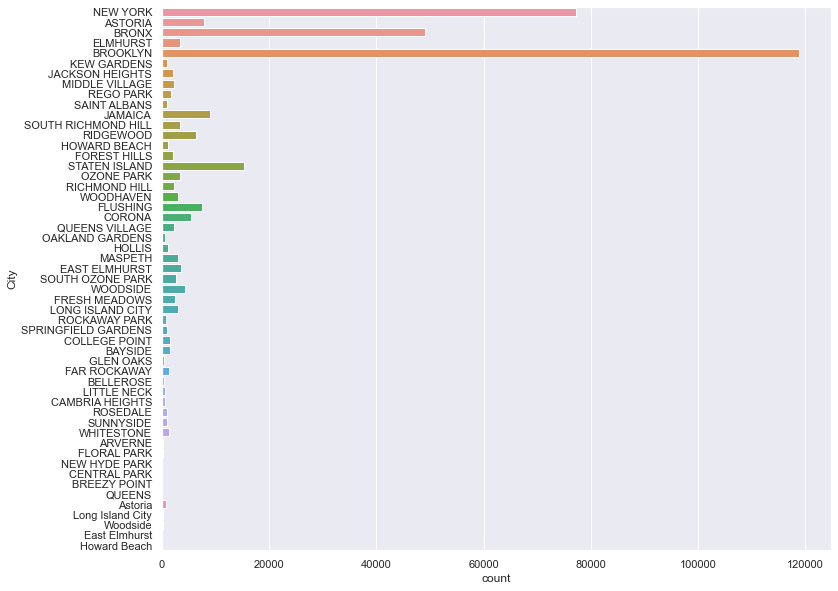

In [275]:
#Draw a frequency plot for city-wise complaints
plt.figure(figsize=(12,10))
sns.countplot(y="City", data=reqs_df)


In [276]:
#Draw scatter and hexbin plots for complaint concentration across Brooklyn
brooklyn_df = reqs_df[reqs_df['City']=='BROOKLYN']
brooklyn_df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
5,2015-12-31 23:56:30,2016-01-01 01:50:11,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,6 AVENUE,...,BROOKLYN,986312.0,180032.0,BROOKLYN,NaN,NaN,NaN,NaN,40.660823,-73.992568
9,2015-12-31 23:53:58,2016-01-01 01:17:40,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,NEW UTRECHT AVENUE,...,BROOKLYN,984378.0,166541.0,BROOKLYN,NaN,NaN,NaN,NaN,40.623793,-73.999539
13,2015-12-31 23:47:58,2016-01-01 08:18:47,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,CRESCENT STREET,DEAD END,...,BROOKLYN,1019054.0,189780.0,BROOKLYN,NaN,NaN,NaN,NaN,40.687511,-73.874505
17,2015-12-31 23:44:52,2016-01-01 00:36:10,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,3 AVENUE,4 AVENUE,...,BROOKLYN,988846.0,186711.0,BROOKLYN,NaN,NaN,NaN,NaN,40.679154,-73.983430
18,2015-12-31 23:40:59,2016-01-01 02:37:28,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,EAST 46 STREET,AVENUE O,...,BROOKLYN,1003628.0,163910.0,BROOKLYN,NaN,NaN,NaN,NaN,40.616550,-73.930202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,2015-01-01 00:23:55,2015-01-01 02:58:38,Blocked Driveway,No Access,Street/Sidewalk,11201.0,229 DUFFIELD STREET,DUFFIELD STREET,WILLOUGHBY STREET,FULTON STREET,...,BROOKLYN,988583.0,191117.0,BROOKLYN,NaN,NaN,NaN,NaN,40.691248,-73.984375
364541,2015-01-01 00:19:22,2015-01-01 02:41:10,Blocked Driveway,No Access,Street/Sidewalk,11211.0,27 HOPE STREET,HOPE STREET,ROEBLING STREET,HAVEMEYER STREET,...,BROOKLYN,996180.0,199268.0,BROOKLYN,NaN,NaN,NaN,NaN,40.713613,-73.956966
364544,2015-01-01 00:17:48,2015-01-01 03:24:48,Noise - Commercial,Loud Music/Party,Store/Commercial,11217.0,242 FLATBUSH AVENUE,FLATBUSH AVENUE,BERGEN STREET,6 AVENUE,...,BROOKLYN,991249.0,187148.0,BROOKLYN,NaN,NaN,NaN,NaN,40.680352,-73.974766
364545,2015-01-01 00:17:47,2015-01-01 00:51:13,Blocked Driveway,No Access,Street/Sidewalk,11237.0,1373 DECATUR STREET,DECATUR STREET,KNICKERBOCKER AVENUE,IRVING AVENUE,...,BROOKLYN,1010869.0,191545.0,BROOKLYN,NaN,NaN,NaN,NaN,40.692384,-73.904011


In [286]:
#Draw scatter and hexbin plots for complaint concentration across Brooklyn

#Before plotting scatter plot, categorical variables encoded
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(brooklyn_df['Cross Street 1'])
brooklyn_df['Cross Street 1'] = le.transform(brooklyn_df['Cross Street 1'])
ca_labels = dict(zip(le.classes_, le.transform(le.classes_)))


le.fit(brooklyn_df['Cross Street 2'])
brooklyn_df['Cross Street 2'] = le.transform(brooklyn_df['Cross Street 2'])
ca_labels = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(brooklyn_df['Complaint Type'])
brooklyn_df['Complaint Type'] = le.transform(brooklyn_df['Complaint Type'])
ca_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ca_labels)

ca_labels = dict(zip(le.classes_, le.transform(le.classes_)))



{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}


C:\Users\harceroj\AppData\Local\Temp\ipykernel_9408\3683131048.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Cross Street 1'] = le.transform(brooklyn_df['Cross Street 1'])
C:\Users\harceroj\AppData\Local\Temp\ipykernel_9408\3683131048.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Cross Street 2'] = le.transform(brooklyn_df['Cross Street 2'])
C:\Users\harceroj\AppData\Local\Temp\ipykernel_9408\3683131048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a c

<AxesSubplot:xlabel='Cross Street 1', ylabel='Cross Street 2'>

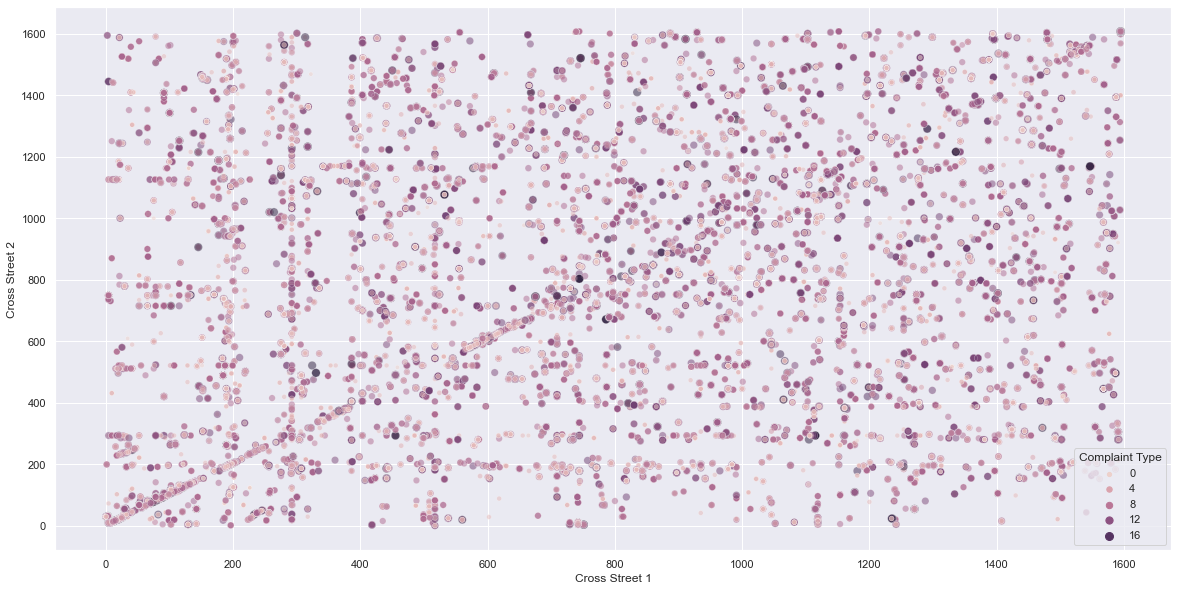

In [278]:
#Draw scatter plots for complaint concentration across Brooklyn
sns.scatterplot(data=brooklyn_df, x="Cross Street 1", y="Cross Street 2",hue='Complaint Type', size="Complaint Type", legend=True, alpha=0.5)

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


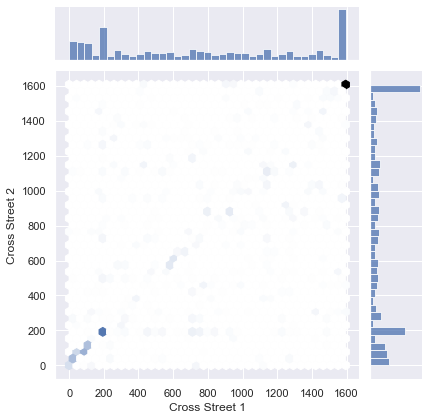

In [279]:
sns.jointplot('Cross Street 1', 'Cross Street 2', data=brooklyn_df,kind='hex')

<AxesSubplot:xlabel='Complaint Type', ylabel='count'>

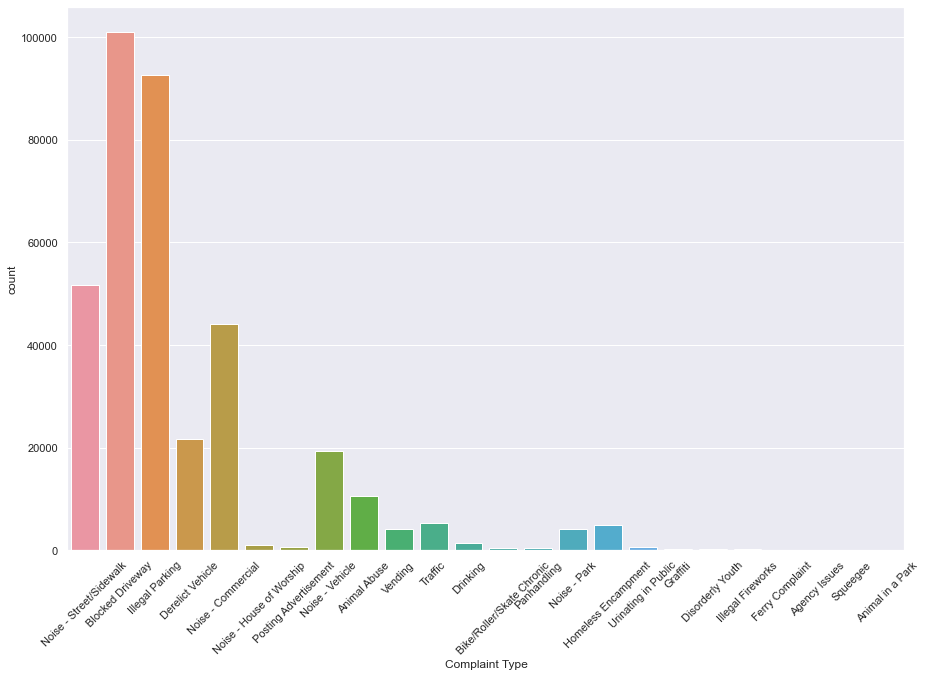

In [281]:
#Plot a bar graph of count vs. complaint types
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(
        x='Complaint Type',data=reqs_df
    )

In [282]:
#Find the top 10 types of complaints
df_count = reqs_df.groupby('Complaint Type').size().reset_index(name='Counts').sort_values(by=['Counts'],ascending=False).nlargest(10,'Counts')
df_count

,Complaint Type,Counts
4,Blocked Driveway,100881
12,Illegal Parking,92679
16,Noise - Street/Sidewalk,51692
13,Noise - Commercial,44109
5,Derelict Vehicle,21661
17,Noise - Vehicle,19352
1,Animal Abuse,10541
21,Traffic,5198
10,Homeless Encampment,4879
23,Vending,4192


In [283]:
#Display the types of complaints in each city in a separate dataset
complaint_city_df = reqs_df.groupby(['City','Complaint Type']).size().reset_index(name='counts')


In [289]:
#Visualize the major types of complaints in each city
top_complaints_city = complaint_city_df.sort_values(['City','counts'], ascending=[True, False]).groupby('City', group_keys=False).apply(lambda x: x.head(3))
print(top_complaints_city)


         City      Complaint Type  counts
7     ARVERNE     Illegal Parking      62
1     ARVERNE    Blocked Driveway      50
0     ARVERNE        Animal Abuse      46
19    ASTORIA    Blocked Driveway    3436
27    ASTORIA  Noise - Commercial    1653
..        ...                 ...     ...
763  WOODSIDE     Illegal Parking    1083
757  WOODSIDE    Derelict Vehicle     298
774  Woodside     Illegal Parking     124
772  Woodside    Blocked Driveway      27
773  Woodside    Derelict Vehicle       8

[155 rows x 3 columns]


In [285]:
#5. Check if the average response time across various types of complaints
reqs_df['RespTimeHrs'] = (reqs_df['Closed Date'] - reqs_df['Created Date']).astype('timedelta64[m]')
reqs_df['RespTimeHrs']
reqs_df['RespTimeHrs'].describe()
reqs_df.groupby(['Complaint Type'])['RespTimeHrs'].describe()


,count,mean,std,min,25%,50%,75%,max
Complaint Type,,,,,,,,
Agency Issues,8.0,304.375000,222.161420,31.0,138.25,294.0,466.50,623.0
Animal Abuse,10541.0,299.736553,468.389924,0.0,96.00,194.0,371.00,31155.0
Animal in a Park,1.0,20210.000000,NaN,20210.0,20210.00,20210.0,20210.00,20210.0
Bike/Roller/Skate Chronic,478.0,216.864017,246.599890,0.0,59.00,138.5,291.00,2034.0
Blocked Driveway,100881.0,269.361852,310.441157,0.0,92.00,182.0,342.00,8897.0
Derelict Vehicle,21661.0,419.379392,626.894177,0.0,97.00,237.0,492.00,13402.0
Disorderly Youth,315.0,205.577778,217.446493,6.0,70.50,141.0,272.50,1683.0
Drinking,1409.0,229.027679,304.104750,0.0,72.00,153.0,293.00,5686.0
Ferry Complaint,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
